In [1]:
# Load the libraries
import torch
import os
import librosa


from BEATs.Tokenizers import TokenizersConfig, Tokenizers
from BEATs.BEATs import BEATs, BEATsConfig

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Test BEATs with the provided code

In [71]:
### Tokenizer

# load the pre-trained checkpoints
checkpoint = torch.load('/data/BEATs/Tokenizer_iter3_plus_AS2M.pt')

cfg = TokenizersConfig(checkpoint['cfg'])
BEATs_tokenizer = Tokenizers(cfg)
BEATs_tokenizer.load_state_dict(checkpoint['model'])
BEATs_tokenizer.eval()

# tokenize the audio and generate the labels
audio_input_16khz = torch.randn(1, 10000)
padding_mask = torch.zeros(1, 10000).bool()

labels = BEATs_tokenizer.extract_labels(audio_input_16khz, padding_mask=padding_mask)

In [72]:
labels.shape

torch.Size([24])

In [68]:
# load the pre-trained checkpoints
checkpoint = torch.load('/data/BEATs/BEATs_iter3_plus_AS2M.pt')

cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()

# extract the the audio representation
audio_input_16khz = torch.randn(1, 10000)
padding_mask = torch.zeros(1, 10000).bool()

representation = BEATs_model.extract_features(audio_input_16khz, padding_mask=padding_mask)[0]

In [81]:
representation.shape

torch.Size([1, 728, 768])

In [5]:
# load the fine-tuned checkpoints
checkpoint = torch.load('/data/BEATs/BEATs_iter3_plus_AS2M_finetuned_on_AS2M_cpt2.pt')

cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()

# predict the classification probability of each class
audio_input_16khz = torch.randn(3, 10000)
padding_mask = torch.zeros(3, 10000).bool()

probs = BEATs_model.extract_features(audio_input_16khz, padding_mask=padding_mask)[0]

for i, (top5_label_prob, top5_label_idx) in enumerate(zip(*probs.topk(k=5))):
    top5_label = [checkpoint['label_dict'][label_idx.item()] for label_idx in top5_label_idx]
    print(f'Top 5 predicted labels of the {i}th audio are {top5_label} with probability of {top5_label_prob}')

Top 5 predicted labels of the 0th audio are ['/m/07rgkc5', '/m/0chx_', '/m/09x0r', '/m/096m7z', '/m/07qlf79'] with probability of tensor([0.3791, 0.1794, 0.1358, 0.0990, 0.0479], grad_fn=<UnbindBackward0>)
Top 5 predicted labels of the 1th audio are ['/m/07rgkc5', '/m/09x0r', '/m/0chx_', '/m/096m7z', '/m/07qlf79'] with probability of tensor([0.2908, 0.1879, 0.1221, 0.0838, 0.0393], grad_fn=<UnbindBackward0>)
Top 5 predicted labels of the 2th audio are ['/m/07rgkc5', '/m/0chx_', '/m/09x0r', '/m/096m7z', '/m/0cj0r'] with probability of tensor([0.2728, 0.1902, 0.1746, 0.1271, 0.0516], grad_fn=<UnbindBackward0>)


In [11]:
BEATs_model.parameters

<bound method Module.parameters of BEATs(
  (post_extract_proj): Linear(in_features=512, out_features=768, bias=True)
  (patch_embedding): Conv2d(1, 512, kernel_size=(16, 16), stride=(16, 16), bias=False)
  (dropout_input): Dropout(p=0.0, inplace=False)
  (encoder): TransformerEncoder(
    (pos_conv): Sequential(
      (0): Conv1d(768, 768, kernel_size=(128,), stride=(1,), padding=(64,), groups=16)
      (1): SamePad()
      (2): GELU()
    )
    (layers): ModuleList(
      (0): TransformerSentenceEncoderLayer(
        (self_attn): MultiheadAttention(
          (dropout_module): Dropout(p=0.0, inplace=False)
          (relative_attention_bias): Embedding(320, 12)
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
          (grep_linear): Linear(in

# Test BEATs with my own files

In [93]:
import glob

data_folder = "/data/different_bird_songs/"
data = glob.glob(data_folder + "/**/*.mp3", recursive=True)

In [99]:
# Open file and resample at 16000Hz
trs = []
l = []

for afile in data:
    sig, sr = librosa.load(afile, sr = 16000, mono=True)
    sig_t = torch.tensor(sig).unsqueeze(0)
    trs.append(sig_t)
    l.append(afile.split("/")[-2])

/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/util/decora

In [101]:
# load the pre-trained checkpoints for the tokenizer
checkpoint = torch.load('/data/BEATs/Tokenizer_iter3_plus_AS2M.pt')
cfg = TokenizersConfig(checkpoint['cfg'])
BEATs_tokenizer = Tokenizers(cfg)
BEATs_tokenizer.load_state_dict(checkpoint['model'])
BEATs_tokenizer.eval()

# tokenize the audio and generate the labels
labels = BEATs_tokenizer.extract_labels(trs[0], padding_mask=padding_mask)

In [102]:
labels.shape

torch.Size([728])

In [141]:
# load the pre-trained checkpoints
checkpoint = torch.load('/data/BEATs/BEATs_iter3_plus_AS2M.pt')
cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()

# extract the the audio representation
l_representations = []

for t in trs:
    padding_mask = torch.zeros(t.shape[0], t.shape[1]).bool()
    representation = BEATs_model.extract_features(t, padding_mask=padding_mask)[0]
    # DIMENSIONS are: Batch / Number of labels / Audio encoded in 768 dimension
    l_representations.append(representation[:,-1,:]) # Take only the last dimension as this is the encoded audio

In [183]:
padding_mask.shape

torch.Size([1, 235712])

In [185]:
trs[1].shape

torch.Size([1, 185440])

In [176]:
from sklearn.manifold import TSNE

representation = torch.cat(l_representations, dim=0)
representation = representation.detach().numpy()
tsne = TSNE(n_components=2, perplexity=5)
representation_2d = tsne.fit_transform(representation)

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

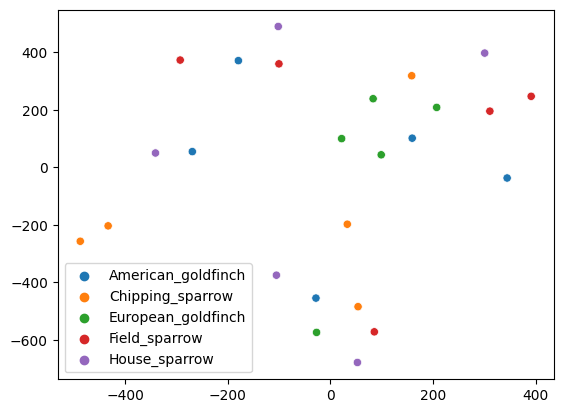

In [178]:
import seaborn as sns
sns.scatterplot(x = representation_2d[:, 0], y = representation_2d[:, 1], hue = l)

In [179]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
representation_2d_pca = tsne.fit_transform(representation)

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
import torch

tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [14]:
tensor.shape

torch.Size([2, 2, 3])